In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.utils.data import TensorDataset, DataLoader, StackDataset
from torch import nn
from torch_scatter import scatter_add
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("..")
from dnn.dataset import *

In [2]:
pion_files = ["histo_9373196_0.root", "histo_9373221_145.root", "histo_9373221_325.root", "histo_9373221_55.root", "histo_9375064_235.root", "histo_9373196_100.root", "histo_9373221_146.root", "histo_9373221_326.root", "histo_9373221_56.root", "histo_9375064_236.root", "histo_9373196_101.root", "histo_9373221_147.root", "histo_9373221_327.root", "histo_9373221_57.root", "histo_9375064_237.root", "histo_9373196_102.root", "histo_9373221_148.root", "histo_9373221_328.root", "histo_9373221_58.root", "histo_9375064_238.root", "histo_9373196_103.root", "histo_9373221_149.root", "histo_9373221_329.root", "histo_9373221_59.root", "histo_9375064_239.root", "histo_9373196_104.root", "histo_9373221_14.root", "histo_9373221_32.root", "histo_9373221_5.root", "histo_9375064_23.root", "histo_9373196_105.root", "histo_9373221_150.root", "histo_9373221_330.root", "histo_9373221_60.root", "histo_9375064_240.root", "histo_9373196_106.root", "histo_9373221_151.root", "histo_9373221_331.root", "histo_9373221_61.root", "histo_9375064_241.root", "histo_9373196_107.root", "histo_9373221_152.root", "histo_9373221_332.root", "histo_9373221_62.root", "histo_9375064_242.root", "histo_9373196_108.root", "histo_9373221_153.root", "histo_9373221_333.root", "histo_9373221_63.root", "histo_9375064_243.root", "histo_9373196_109.root", "histo_9373221_154.root", "histo_9373221_334.root", "histo_9373221_64.root", "histo_9375064_244.root", "histo_9373196_10.root", "histo_9373221_155.root", "histo_9373221_335.root", "histo_9373221_65.root", "histo_9375064_245.root", "histo_9373196_110.root", "histo_9373221_156.root", "histo_9373221_336.root", "histo_9373221_66.root", "histo_9375064_246.root", "histo_9373196_111.root", "histo_9373221_157.root", "histo_9373221_337.root", "histo_9373221_67.root", "histo_9375064_247.root", "histo_9373196_112.root", "histo_9373221_158.root", "histo_9373221_338.root", "histo_9373221_68.root", "histo_9375064_248.root", "histo_9373196_113.root", "histo_9373221_159.root", "histo_9373221_339.root", "histo_9373221_69.root", "histo_9375064_249.root", "histo_9373196_114.root", "histo_9373221_15.root", "histo_9373221_33.root", "histo_9373221_6.root", "histo_9375064_24.root", "histo_9373196_115.root", "histo_9373221_160.root", "histo_9373221_340.root", "histo_9373221_70.root", "histo_9375064_250.root", "histo_9373196_116.root", "histo_9373221_161.root", "histo_9373221_341.root", "histo_9373221_71.root", "histo_9375064_251.root", "histo_9373196_117.root", "histo_9373221_162.root", "histo_9373221_342.root", "histo_9373221_72.root", "histo_9375064_252.root", "histo_9373196_118.root", "histo_9373221_163.root", "histo_9373221_343.root", "histo_9373221_73.root", "histo_9375064_253.root", "histo_9373196_119.root", "histo_9373221_164.root", "histo_9373221_344.root", "histo_9373221_74.root", "histo_9375064_254.root", "histo_9373196_11.root", "histo_9373221_165.root", "histo_9373221_345.root", "histo_9373221_75.root", "histo_9375064_255.root", "histo_9373196_120.root", "histo_9373221_166.root", "histo_9373221_346.root", "histo_9373221_76.root", "histo_9375064_256.root", "histo_9373196_121.root", "histo_9373221_167.root", "histo_9373221_347.root", "histo_9373221_77.root", "histo_9375064_257.root", "histo_9373196_122.root", "histo_9373221_168.root", "histo_9373221_348.root", "histo_9373221_78.root", "histo_9375064_258.root", "histo_9373196_123.root", "histo_9373221_169.root", "histo_9373221_349.root", "histo_9373221_79.root", "histo_9375064_259.root", "histo_9373196_124.root", "histo_9373221_16.root", "histo_9373221_34.root", "histo_9373221_7.root", "histo_9375064_25.root", "histo_9373196_125.root", "histo_9373221_170.root", "histo_9373221_350.root", "histo_9373221_80.root", "histo_9375064_260.root", "histo_9373196_126.root", "histo_9373221_171.root", "histo_9373221_351.root", "histo_9373221_81.root", "histo_9375064_261.root", "histo_9373196_127.root", "histo_9373221_172.root", "histo_9373221_352.root", "histo_9373221_82.root", "histo_9375064_262.root", "histo_9373196_128.root", "histo_9373221_173.root", "histo_9373221_353.root", "histo_9373221_83.root", "histo_9375064_263.root", "histo_9373196_129.root", "histo_9373221_174.root", "histo_9373221_354.root", "histo_9373221_84.root", "histo_9375064_264.root", "histo_9373196_12.root", "histo_9373221_175.root", "histo_9373221_355.root", "histo_9373221_85.root", "histo_9375064_265.root", "histo_9373196_130.root", "histo_9373221_176.root", "histo_9373221_356.root", "histo_9373221_86.root", "histo_9375064_266.root", "histo_9373196_131.root", "histo_9373221_177.root", "histo_9373221_357.root", "histo_9373221_87.root", "histo_9375064_267.root", "histo_9373196_132.root", "histo_9373221_178.root", "histo_9373221_358.root", "histo_9373221_88.root", "histo_9375064_268.root", "histo_9373196_133.root", "histo_9373221_179.root", "histo_9373221_359.root", "histo_9373221_89.root", "histo_9375064_269.root", "histo_9373196_134.root", "histo_9373221_17.root", "histo_9373221_35.root", "histo_9373221_8.root", "histo_9375064_26.root", "histo_9373196_135.root", "histo_9373221_180.root", "histo_9373221_360.root", "histo_9373221_90.root", "histo_9375064_270.root", "histo_9373196_136.root", "histo_9373221_181.root", "histo_9373221_361.root", "histo_9373221_91.root", "histo_9375064_271.root", "histo_9373196_137.root", "histo_9373221_182.root", "histo_9373221_362.root", "histo_9373221_92.root", "histo_9375064_272.root", "histo_9373196_138.root", "histo_9373221_183.root", "histo_9373221_363.root", "histo_9373221_93.root", "histo_9375064_273.root", "histo_9373196_139.root", "histo_9373221_184.root", "histo_9373221_364.root", "histo_9373221_94.root", "histo_9375064_274.root", "histo_9373196_13.root", "histo_9373221_185.root", "histo_9373221_365.root", "histo_9373221_95.root", "histo_9375064_275.root", "histo_9373196_140.root", "histo_9373221_186.root", "histo_9373221_366.root", "histo_9373221_96.root", "histo_9375064_276.root", "histo_9373196_141.root", "histo_9373221_187.root", "histo_9373221_367.root", "histo_9373221_97.root", "histo_9375064_277.root", "histo_9373196_142.root", "histo_9373221_188.root", "histo_9373221_368.root", "histo_9373221_98.root", "histo_9375064_278.root", "histo_9373196_143.root", "histo_9373221_189.root", "histo_9373221_369.root", "histo_9373221_99.root", "histo_9375064_279.root", "histo_9373196_144.root", "histo_9373221_18.root", "histo_9373221_36.root", "histo_9373221_9.root", "histo_9375064_27.root", "histo_9373196_145.root", "histo_9373221_190.root", "histo_9373221_370.root", "histo_9375064_0.root", "histo_9375064_280.root", "histo_9373196_146.root", "histo_9373221_191.root", "histo_9373221_371.root", "histo_9375064_100.root", "histo_9375064_281.root", "histo_9373196_147.root", "histo_9373221_192.root", "histo_9373221_372.root", "histo_9375064_101.root", "histo_9375064_282.root", "histo_9373196_148.root", "histo_9373221_193.root", "histo_9373221_373.root", "histo_9375064_102.root", "histo_9375064_283.root", "histo_9373196_149.root", "histo_9373221_194.root", "histo_9373221_374.root", "histo_9375064_103.root", "histo_9375064_284.root", "histo_9373196_14.root", "histo_9373221_195.root", "histo_9373221_375.root", "histo_9375064_104.root", "histo_9375064_285.root", "histo_9373196_15.root", "histo_9373221_196.root", "histo_9373221_376.root", "histo_9375064_105.root", "histo_9375064_286.root", "histo_9373196_16.root", "histo_9373221_197.root", "histo_9373221_377.root", "histo_9375064_106.root", "histo_9375064_287.root", "histo_9373196_17.root", "histo_9373221_198.root", "histo_9373221_378.root", "histo_9375064_107.root", "histo_9375064_288.root", "histo_9373196_18.root", "histo_9373221_199.root", "histo_9373221_379.root", "histo_9375064_108.root", "histo_9375064_289.root", "histo_9373196_19.root", "histo_9373221_19.root", "histo_9373221_37.root", "histo_9375064_109.root", "histo_9375064_28.root", "histo_9373196_1.root", "histo_9373221_1.root", "histo_9373221_380.root", "histo_9375064_10.root", "histo_9375064_290.root", "histo_9373196_20.root", "histo_9373221_200.root", "histo_9373221_381.root", "histo_9375064_110.root", "histo_9375064_291.root", "histo_9373196_21.root", "histo_9373221_201.root", "histo_9373221_382.root", "histo_9375064_111.root", "histo_9375064_292.root", "histo_9373196_22.root", "histo_9373221_202.root", "histo_9373221_383.root", "histo_9375064_112.root", "histo_9375064_293.root", "histo_9373196_23.root", "histo_9373221_203.root", "histo_9373221_384.root", "histo_9375064_113.root", "histo_9375064_294.root", "histo_9373196_24.root", "histo_9373221_204.root", "histo_9373221_385.root", "histo_9375064_114.root", "histo_9375064_295.root", "histo_9373196_25.root", "histo_9373221_205.root", "histo_9373221_386.root", "histo_9375064_115.root", "histo_9375064_296.root", "histo_9373196_26.root", "histo_9373221_206.root", "histo_9373221_387.root", "histo_9375064_116.root", "histo_9375064_297.root", "histo_9373196_27.root", "histo_9373221_207.root", "histo_9373221_388.root", "histo_9375064_117.root", "histo_9375064_298.root", "histo_9373196_28.root", "histo_9373221_208.root", "histo_9373221_389.root", "histo_9375064_118.root", "histo_9375064_299.root", "histo_9373196_29.root", "histo_9373221_209.root", "histo_9373221_38.root", "histo_9375064_119.root", "histo_9375064_29.root", "histo_9373196_2.root", "histo_9373221_20.root", "histo_9373221_390.root", "histo_9375064_11.root", "histo_9375064_2.root", "histo_9373196_30.root", "histo_9373221_210.root", "histo_9373221_391.root", "histo_9375064_120.root", "histo_9375064_300.root", "histo_9373196_31.root", "histo_9373221_211.root", "histo_9373221_392.root", "histo_9375064_121.root", "histo_9375064_301.root", "histo_9373196_32.root", "histo_9373221_212.root", "histo_9373221_393.root", "histo_9375064_122.root", "histo_9375064_302.root", "histo_9373196_33.root", "histo_9373221_213.root", "histo_9373221_394.root", "histo_9375064_123.root", "histo_9375064_303.root", "histo_9373196_34.root", "histo_9373221_214.root", "histo_9373221_395.root", "histo_9375064_124.root", "histo_9375064_304.root", "histo_9373196_35.root", "histo_9373221_215.root", "histo_9373221_396.root", "histo_9375064_125.root", "histo_9375064_305.root", "histo_9373196_36.root", "histo_9373221_216.root", "histo_9373221_397.root", "histo_9375064_126.root", "histo_9375064_306.root", "histo_9373196_37.root", "histo_9373221_217.root", "histo_9373221_398.root", "histo_9375064_127.root", "histo_9375064_307.root", "histo_9373196_38.root", "histo_9373221_218.root", "histo_9373221_399.root", "histo_9375064_128.root", "histo_9375064_308.root", "histo_9373196_39.root", "histo_9373221_219.root", "histo_9373221_39.root", "histo_9375064_129.root", "histo_9375064_309.root", "histo_9373196_3.root", "histo_9373221_21.root", "histo_9373221_3.root", "histo_9375064_12.root", "histo_9375064_30.root", "histo_9373196_40.root", "histo_9373221_220.root", "histo_9373221_400.root", "histo_9375064_130.root", "histo_9375064_310.root", "histo_9373196_41.root", "histo_9373221_221.root", "histo_9373221_401.root", "histo_9375064_131.root", "histo_9375064_311.root", "histo_9373196_42.root", "histo_9373221_222.root", "histo_9373221_402.root", "histo_9375064_132.root", "histo_9375064_312.root", "histo_9373196_43.root", "histo_9373221_223.root", "histo_9373221_403.root", "histo_9375064_133.root", "histo_9375064_313.root", "histo_9373196_44.root", "histo_9373221_224.root", "histo_9373221_404.root", "histo_9375064_134.root", "histo_9375064_314.root", "histo_9373196_45.root", "histo_9373221_225.root", "histo_9373221_405.root", "histo_9375064_135.root", "histo_9375064_315.root", "histo_9373196_46.root", "histo_9373221_226.root", "histo_9373221_406.root", "histo_9375064_136.root", "histo_9375064_316.root", "histo_9373196_47.root", "histo_9373221_227.root", "histo_9373221_407.root", "histo_9375064_137.root", "histo_9375064_317.root", "histo_9373196_48.root", "histo_9373221_228.root", "histo_9373221_408.root", "histo_9375064_138.root", "histo_9375064_318.root", "histo_9373196_49.root", "histo_9373221_229.root", "histo_9373221_409.root", "histo_9375064_139.root", "histo_9375064_319.root", "histo_9373196_4.root", "histo_9373221_22.root", "histo_9373221_40.root", "histo_9375064_13.root", "histo_9375064_31.root", "histo_9373196_50.root", "histo_9373221_230.root", "histo_9373221_410.root", "histo_9375064_140.root", "histo_9375064_320.root", "histo_9373196_51.root", "histo_9373221_231.root", "histo_9373221_411.root", "histo_9375064_141.root", "histo_9375064_321.root", "histo_9373196_52.root", "histo_9373221_232.root", "histo_9373221_412.root", "histo_9375064_142.root", "histo_9375064_322.root", "histo_9373196_53.root", "histo_9373221_233.root", "histo_9373221_413.root", "histo_9375064_143.root", "histo_9375064_323.root", "histo_9373196_54.root", "histo_9373221_234.root", "histo_9373221_414.root", "histo_9375064_144.root", "histo_9375064_324.root", "histo_9373196_55.root", "histo_9373221_235.root", "histo_9373221_415.root", "histo_9375064_145.root", "histo_9375064_325.root", "histo_9373196_56.root", "histo_9373221_236.root", "histo_9373221_416.root", "histo_9375064_146.root", "histo_9375064_326.root", "histo_9373196_57.root", "histo_9373221_237.root", "histo_9373221_417.root", "histo_9375064_147.root", "histo_9375064_327.root", "histo_9373196_58.root", "histo_9373221_238.root", "histo_9373221_418.root", "histo_9375064_148.root", "histo_9375064_328.root", "histo_9373196_59.root", "histo_9373221_239.root", "histo_9373221_419.root", "histo_9375064_149.root", "histo_9375064_329.root", "histo_9373196_5.root", "histo_9373221_23.root", "histo_9373221_41.root", "histo_9375064_14.root", "histo_9375064_32.root", "histo_9373196_60.root", "histo_9373221_240.root", "histo_9373221_420.root", "histo_9375064_150.root", "histo_9375064_330.root", "histo_9373196_61.root", "histo_9373221_241.root", "histo_9373221_421.root", "histo_9375064_151.root", "histo_9375064_331.root", "histo_9373196_62.root", "histo_9373221_242.root", "histo_9373221_422.root", "histo_9375064_152.root", "histo_9375064_332.root", "histo_9373196_63.root", "histo_9373221_243.root", "histo_9373221_423.root", "histo_9375064_153.root", "histo_9375064_333.root", "histo_9373196_64.root", "histo_9373221_244.root", "histo_9373221_424.root", "histo_9375064_154.root", "histo_9375064_334.root", "histo_9373196_65.root", "histo_9373221_245.root", "histo_9373221_425.root", "histo_9375064_155.root", "histo_9375064_335.root", "histo_9373196_66.root", "histo_9373221_246.root", "histo_9373221_426.root", "histo_9375064_156.root", "histo_9375064_336.root", "histo_9373196_67.root", "histo_9373221_247.root", "histo_9373221_427.root", "histo_9375064_157.root", "histo_9375064_337.root", "histo_9373196_68.root", "histo_9373221_248.root", "histo_9373221_428.root", "histo_9375064_158.root", "histo_9375064_338.root", "histo_9373196_69.root", "histo_9373221_249.root", "histo_9373221_429.root", "histo_9375064_159.root", "histo_9375064_339.root", "histo_9373196_6.root", "histo_9373221_24.root", "histo_9373221_42.root", "histo_9375064_15.root", "histo_9375064_33.root", "histo_9373196_70.root", "histo_9373221_250.root", "histo_9373221_430.root", "histo_9375064_160.root", "histo_9375064_340.root", "histo_9373196_71.root", "histo_9373221_251.root", "histo_9373221_431.root", "histo_9375064_161.root", "histo_9375064_341.root", "histo_9373196_72.root", "histo_9373221_252.root", "histo_9373221_432.root", "histo_9375064_162.root", "histo_9375064_342.root", "histo_9373196_73.root", "histo_9373221_253.root", "histo_9373221_433.root", "histo_9375064_163.root", "histo_9375064_343.root", "histo_9373196_74.root", "histo_9373221_254.root", "histo_9373221_434.root", "histo_9375064_164.root", "histo_9375064_344.root", "histo_9373196_75.root", "histo_9373221_255.root", "histo_9373221_435.root", "histo_9375064_165.root", "histo_9375064_345.root", "histo_9373196_76.root", "histo_9373221_256.root", "histo_9373221_436.root", "histo_9375064_166.root", "histo_9375064_346.root", "histo_9373196_77.root", "histo_9373221_257.root", "histo_9373221_437.root", "histo_9375064_167.root", "histo_9375064_347.root", "histo_9373196_78.root", "histo_9373221_258.root", "histo_9373221_438.root", "histo_9375064_168.root", "histo_9375064_348.root", "histo_9373196_79.root", "histo_9373221_259.root", "histo_9373221_439.root", "histo_9375064_169.root", "histo_9375064_349.root", "histo_9373196_7.root", "histo_9373221_25.root", "histo_9373221_43.root", "histo_9375064_16.root", "histo_9375064_34.root", "histo_9373196_80.root", "histo_9373221_260.root", "histo_9373221_440.root", "histo_9375064_170.root", "histo_9375064_35.root", "histo_9373196_81.root", "histo_9373221_261.root", "histo_9373221_441.root", "histo_9375064_171.root", "histo_9375064_36.root", "histo_9373196_82.root", "histo_9373221_262.root", "histo_9373221_442.root", "histo_9375064_172.root", "histo_9375064_37.root", "histo_9373196_83.root", "histo_9373221_263.root", "histo_9373221_443.root", "histo_9375064_173.root", "histo_9375064_38.root", "histo_9373196_84.root", "histo_9373221_264.root", "histo_9373221_444.root", "histo_9375064_174.root", "histo_9375064_39.root", "histo_9373196_85.root", "histo_9373221_265.root", "histo_9373221_445.root", "histo_9375064_175.root", "histo_9375064_3.root", "histo_9373196_86.root", "histo_9373221_266.root", "histo_9373221_446.root", "histo_9375064_176.root", "histo_9375064_40.root", "histo_9373196_87.root", "histo_9373221_267.root", "histo_9373221_447.root", "histo_9375064_177.root", "histo_9375064_41.root", "histo_9373196_88.root", "histo_9373221_268.root", "histo_9373221_448.root", "histo_9375064_178.root", "histo_9375064_42.root", "histo_9373196_89.root", "histo_9373221_269.root", "histo_9373221_449.root", "histo_9375064_179.root", "histo_9375064_43.root", "histo_9373196_8.root", "histo_9373221_26.root", "histo_9373221_44.root", "histo_9375064_17.root", "histo_9375064_44.root", "histo_9373196_90.root", "histo_9373221_270.root", "histo_9373221_450.root", "histo_9375064_180.root", "histo_9375064_45.root", "histo_9373196_91.root", "histo_9373221_271.root", "histo_9373221_451.root", "histo_9375064_181.root", "histo_9375064_46.root", "histo_9373196_92.root", "histo_9373221_272.root", "histo_9373221_452.root", "histo_9375064_182.root", "histo_9375064_47.root", "histo_9373196_93.root", "histo_9373221_273.root", "histo_9373221_453.root", "histo_9375064_183.root", "histo_9375064_48.root", "histo_9373196_94.root", "histo_9373221_274.root", "histo_9373221_454.root", "histo_9375064_184.root", "histo_9375064_49.root", "histo_9373196_95.root", "histo_9373221_275.root", "histo_9373221_455.root", "histo_9375064_185.root", "histo_9375064_4.root", "histo_9373196_96.root", "histo_9373221_276.root", "histo_9373221_456.root", "histo_9375064_186.root", "histo_9375064_50.root", "histo_9373196_97.root", "histo_9373221_277.root", "histo_9373221_457.root", "histo_9375064_187.root", "histo_9375064_51.root", "histo_9373196_98.root", "histo_9373221_278.root", "histo_9373221_458.root", "histo_9375064_188.root", "histo_9375064_52.root", "histo_9373196_99.root", "histo_9373221_279.root", "histo_9373221_459.root", "histo_9375064_189.root", "histo_9375064_53.root", "histo_9373196_9.root", "histo_9373221_27.root", "histo_9373221_45.root", "histo_9375064_18.root", "histo_9375064_54.root", "histo_9373221_0.root", "histo_9373221_280.root", "histo_9373221_460.root", "histo_9375064_190.root", "histo_9375064_55.root", "histo_9373221_100.root", "histo_9373221_281.root", "histo_9373221_461.root", "histo_9375064_191.root", "histo_9375064_56.root", "histo_9373221_101.root", "histo_9373221_282.root", "histo_9373221_462.root", "histo_9375064_192.root", "histo_9375064_57.root", "histo_9373221_102.root", "histo_9373221_283.root", "histo_9373221_463.root", "histo_9375064_193.root", "histo_9375064_58.root", "histo_9373221_103.root", "histo_9373221_284.root", "histo_9373221_464.root", "histo_9375064_194.root", "histo_9375064_59.root", "histo_9373221_104.root", "histo_9373221_285.root", "histo_9373221_465.root", "histo_9375064_195.root", "histo_9375064_5.root", "histo_9373221_105.root", "histo_9373221_286.root", "histo_9373221_466.root", "histo_9375064_196.root", "histo_9375064_60.root", "histo_9373221_106.root", "histo_9373221_287.root", "histo_9373221_467.root", "histo_9375064_197.root", "histo_9375064_61.root", "histo_9373221_107.root", "histo_9373221_288.root", "histo_9373221_468.root", "histo_9375064_198.root", "histo_9375064_62.root", "histo_9373221_108.root", "histo_9373221_289.root", "histo_9373221_469.root", "histo_9375064_199.root", "histo_9375064_63.root", "histo_9373221_109.root", "histo_9373221_28.root", "histo_9373221_46.root", "histo_9375064_19.root", "histo_9375064_64.root", "histo_9373221_10.root", "histo_9373221_290.root", "histo_9373221_470.root", "histo_9375064_1.root", "histo_9375064_65.root", "histo_9373221_110.root", "histo_9373221_291.root", "histo_9373221_471.root", "histo_9375064_200.root", "histo_9375064_66.root", "histo_9373221_111.root", "histo_9373221_292.root", "histo_9373221_472.root", "histo_9375064_201.root", "histo_9375064_67.root", "histo_9373221_112.root", "histo_9373221_293.root", "histo_9373221_473.root", "histo_9375064_202.root", "histo_9375064_68.root", "histo_9373221_113.root", "histo_9373221_294.root", "histo_9373221_474.root", "histo_9375064_203.root", "histo_9375064_69.root", "histo_9373221_114.root", "histo_9373221_295.root", "histo_9373221_475.root", "histo_9375064_204.root", "histo_9375064_6.root", "histo_9373221_115.root", "histo_9373221_296.root", "histo_9373221_476.root", "histo_9375064_205.root", "histo_9375064_70.root", "histo_9373221_116.root", "histo_9373221_297.root", "histo_9373221_477.root", "histo_9375064_206.root", "histo_9375064_71.root", "histo_9373221_117.root", "histo_9373221_298.root", "histo_9373221_478.root", "histo_9375064_207.root", "histo_9375064_72.root", "histo_9373221_118.root", "histo_9373221_299.root", "histo_9373221_479.root", "histo_9375064_208.root", "histo_9375064_73.root", "histo_9373221_119.root", "histo_9373221_29.root", "histo_9373221_47.root", "histo_9375064_209.root", "histo_9375064_74.root", "histo_9373221_11.root", "histo_9373221_2.root", "histo_9373221_480.root", "histo_9375064_20.root", "histo_9375064_75.root", "histo_9373221_120.root", "histo_9373221_300.root", "histo_9373221_481.root", "histo_9375064_210.root", "histo_9375064_76.root", "histo_9373221_121.root", "histo_9373221_301.root", "histo_9373221_482.root", "histo_9375064_211.root", "histo_9375064_77.root", "histo_9373221_122.root", "histo_9373221_302.root", "histo_9373221_483.root", "histo_9375064_212.root", "histo_9375064_78.root", "histo_9373221_123.root", "histo_9373221_303.root", "histo_9373221_484.root", "histo_9375064_213.root", "histo_9375064_79.root", "histo_9373221_124.root", "histo_9373221_304.root", "histo_9373221_485.root", "histo_9375064_214.root", "histo_9375064_7.root", "histo_9373221_125.root", "histo_9373221_305.root", "histo_9373221_486.root", "histo_9375064_215.root", "histo_9375064_80.root", "histo_9373221_126.root", "histo_9373221_306.root", "histo_9373221_487.root", "histo_9375064_216.root", "histo_9375064_81.root", "histo_9373221_127.root", "histo_9373221_307.root", "histo_9373221_488.root", "histo_9375064_217.root", "histo_9375064_82.root", "histo_9373221_128.root", "histo_9373221_308.root", "histo_9373221_489.root", "histo_9375064_218.root", "histo_9375064_83.root", "histo_9373221_129.root", "histo_9373221_309.root", "histo_9373221_48.root", "histo_9375064_219.root", "histo_9375064_84.root", "histo_9373221_12.root", "histo_9373221_30.root", "histo_9373221_490.root", "histo_9375064_21.root", "histo_9375064_85.root", "histo_9373221_130.root", "histo_9373221_310.root", "histo_9373221_491.root", "histo_9375064_220.root", "histo_9375064_86.root", "histo_9373221_131.root", "histo_9373221_311.root", "histo_9373221_492.root", "histo_9375064_221.root", "histo_9375064_87.root", "histo_9373221_132.root", "histo_9373221_312.root", "histo_9373221_493.root", "histo_9375064_222.root", "histo_9375064_88.root", "histo_9373221_133.root", "histo_9373221_313.root", "histo_9373221_494.root", "histo_9375064_223.root", "histo_9375064_89.root", "histo_9373221_134.root", "histo_9373221_314.root", "histo_9373221_495.root", "histo_9375064_224.root", "histo_9375064_8.root", "histo_9373221_135.root", "histo_9373221_315.root", "histo_9373221_496.root", "histo_9375064_225.root", "histo_9375064_90.root", "histo_9373221_136.root", "histo_9373221_316.root", "histo_9373221_497.root", "histo_9375064_226.root", "histo_9375064_91.root", "histo_9373221_137.root", "histo_9373221_317.root", "histo_9373221_498.root", "histo_9375064_227.root", "histo_9375064_92.root", "histo_9373221_138.root", "histo_9373221_318.root", "histo_9373221_499.root", "histo_9375064_228.root", "histo_9375064_93.root", "histo_9373221_139.root", "histo_9373221_319.root", "histo_9373221_49.root", "histo_9375064_229.root", "histo_9375064_94.root", "histo_9373221_13.root", "histo_9373221_31.root", "histo_9373221_4.root", "histo_9375064_22.root", "histo_9375064_95.root", "histo_9373221_140.root", "histo_9373221_320.root", "histo_9373221_50.root", "histo_9375064_230.root", "histo_9375064_96.root", "histo_9373221_141.root", "histo_9373221_321.root", "histo_9373221_51.root", "histo_9375064_231.root", "histo_9375064_97.root", "histo_9373221_142.root", "histo_9373221_322.root", "histo_9373221_52.root", "histo_9375064_232.root", "histo_9375064_98.root", "histo_9373221_143.root", "histo_9373221_323.root", "histo_9373221_53.root", "histo_9375064_233.root", "histo_9375064_99.root", "histo_9373221_144.root", "histo_9373221_324.root", "histo_9373221_54.root", "histo_9375064_234.root", "histo_9375064_9.root"]

In [3]:
#uproot.open("root://xrootd-cms.infn.it//eos/cms/store/group/dpg_hgcal/comm_hgcal/mmatthew/Patatrack15/Samples/CloseByPion/histo/histo_9375064_9.root")

In [2]:
input_full = InputSample("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples/histo/histo_*.root", shouldSplitEndcaps=False)

In [3]:
#input = InputSample("/workspaces/ticlRegression/runs/test-v1/24906.0_SinglePi_moreStats/histo.root")
input = input_full

In [4]:
input.tracksters

<Array [{raw_energy: [...], ...}, ..., {...}] type='100000 * {raw_energy: v...'>

In [5]:
TEST_SIZE = 1000
TRAIN_SIZE = len(input.tracksters_splitEndcaps) - TEST_SIZE
TRAIN_SIZE

98360

In [6]:
filteredInputSample = makeSelectedInputSample(input, 0, TRAIN_SIZE)

In [7]:
filteredInputSample.makeStackDataset().datasets["tracksterInEvent_idx"][1]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.], dtype=torch.float64)

In [8]:
train_dataloader = makeDataLoader(filteredInputSample, batch_size=300)

In [9]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 10, dtype=torch.float64),
            nn.Linear(10, 1, dtype=torch.float64),
        )

    def forward(self, x):
        return torch.squeeze(self.model(x), dim=1)
device = torch.device('cuda:0')
net = Network().to(device)
loss_fct = nn.MSELoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=1e-3, weight_decay=1e-3)

In [10]:
def endcap_sum_predictions(model, data_batch):
    return scatter_add(model(data_batch["features"]), data_batch["tracksterInEvent_idx"])
def computeLoss(model, data_batch):
    return loss_fct(endcap_sum_predictions(model, data_batch), data_batch["cp_energy"])

In [11]:
#scatter_add(net(data_batch["features"]), data_batch["tracksterInEvent_idx"])

In [12]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, data_batch in enumerate(dataloader):
        data_batch_device = {key: val.to(device) for key, val in data_batch.items()}
        loss = loss_fn(model, data_batch_device)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            print(f"loss: {loss.item():>7f}")

def full_train(dataloader, model, loss_fn, optimizer, nepochs):
    for epoch in range(nepochs):
        print("########## Epoch " + str(epoch))
        train_loop(dataloader, model, loss_fn, optimizer)

In [13]:
len((train_dataloader))

328

In [14]:
full_train(train_dataloader, net, computeLoss, optimizer, 4)

########## Epoch 0
loss: 36808.938161
loss: 22266.158318
loss: 20713.040030
loss: 19777.494331
loss: 20596.512202
loss: 17770.248981
loss: 19081.033025
loss: 13964.884972
loss: 12984.963426
loss: 12479.034546
loss: 12625.059580
loss: 10451.085709
loss: 10130.757810
loss: 10218.484044
loss: 9592.386712
loss: 9536.646326
loss: 7660.737489
loss: 7274.160482
loss: 6127.502185
loss: 7011.255622
loss: 7522.060477
loss: 7941.621537
loss: 5729.478216
loss: 5893.668110
loss: 4324.454831
loss: 4741.670795
loss: 5202.646529
loss: 2524.728997
loss: 4319.533443
loss: 3964.556539
loss: 3932.309337
loss: 4735.480492
loss: 2743.131630
########## Epoch 1
loss: 2901.455297
loss: 3368.115102
loss: 2931.232170
loss: 3055.388520
loss: 2245.889499
loss: 3235.759784
loss: 2687.064636
loss: 2594.788802
loss: 3004.204929
loss: 2050.972098
loss: 3192.794730
loss: 2375.755421
loss: 2910.785366
loss: 2186.524778
loss: 2580.905676
loss: 2395.012259
loss: 2127.667296
loss: 1866.747810
loss: 1770.217205
loss: 2160.0

## Prediction

In [ ]:
fullDataset = makeSelectedInputSample(input).makeStackDataset()

In [ ]:
pred_loader = makeDataLoader(makeSelectedInputSample(input), batch_size=200000)
pred_batch = next(iter(pred_loader))
pred_batch

{'features': tensor([[5.3591e+01, 1.8497e+00, 3.9999e+02,  ..., 0.0000e+00, 5.3031e+01,
          1.3743e-01],
         [4.5917e+00, 1.8257e+00, 4.0519e+02,  ..., 0.0000e+00, 4.5917e+00,
          0.0000e+00],
         [3.3784e+00, 1.8849e+00, 4.0452e+02,  ..., 0.0000e+00, 3.3784e+00,
          0.0000e+00],
         ...,
         [3.7842e+00, 1.8855e+00, 3.8712e+02,  ..., 0.0000e+00, 3.7295e+00,
          0.0000e+00],
         [2.5185e+00, 1.6116e+00, 3.6086e+02,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [1.4631e+00, 1.7916e+00, 3.7149e+02,  ..., 0.0000e+00, 1.1853e+00,
          0.0000e+00]], dtype=torch.float64),
 'tracksterInEvent_idx': tensor([    0,     0,     0,  ..., 99359, 99359, 99359]),
 'cp_energy': tensor([ 88.1792, 483.5084, 120.6814,  ..., 313.7041, 374.4254, 391.8575],
        dtype=torch.float64)}

In [ ]:
net.to("cpu")
max_E, max_E_tot = 100, 600
bins = 50
h_pred = hist.Hist(hist.axis.Regular(bins, 0., max_E, name="pred_energy", label="Predicted trackster energy (GeV)"))
h_pred.fill(net(pred_batch["features"]).detach().numpy())

h_reco = hist.Hist(hist.axis.Regular(bins, 0., max_E, name="reco_energy", label="Trackster raw energy (GeV)"))
h_reco.fill(ak.flatten(input.tracksters_splitEndcaps.raw_energy))

h_reco_tot = hist.Hist(hist.axis.Regular(bins, 0., max_E_tot, name="reco_energy_tot", label="Total trackster raw energy (GeV)"))
h_reco_tot.fill(ak.sum(input.tracksters_splitEndcaps.raw_energy, axis=-1))

h_pred_tot = hist.Hist(hist.axis.Regular(bins, 0., max_E_tot, name="pred_energy_tot", label="Predicted energy for full endcap (GeV)"))
h_pred_tot.fill(endcap_sum_predictions(net, pred_batch).detach().numpy())

h_cp = hist.Hist(hist.axis.Regular(bins, 0., max_E_tot, name="cp_energy", label="CaloParticle (true) energy (GeV)"))
h_cp.fill(pred_batch["cp_energy"])

h_reco_tot_over_cp = hist.Hist(hist.axis.Regular(bins, 0., 1.2, name="reco_tot_over_cp", label="Total trackster raw energy / CaloParticle energy"))
h_reco_tot_over_cp.fill(ak.sum(input.tracksters_splitEndcaps.raw_energy, axis=-1) / pred_batch["cp_energy"])

h_pred_tot_over_cp = hist.Hist(hist.axis.Regular(bins, 0., 1.2, name="pred_tot_over_cp", label="Total trackster predicted energy / CaloParticle energy"))
h_pred_tot_over_cp.fill(endcap_sum_predictions(net, pred_batch).detach().numpy() / pred_batch["cp_energy"])

Hist(Regular(50, 0, 1.2, name='pred_tot_over_cp', label='Total trackster predicted energy / CaloParticle energy'), storage=Double()) # Sum: 93479.0 (99360.0 with flow)

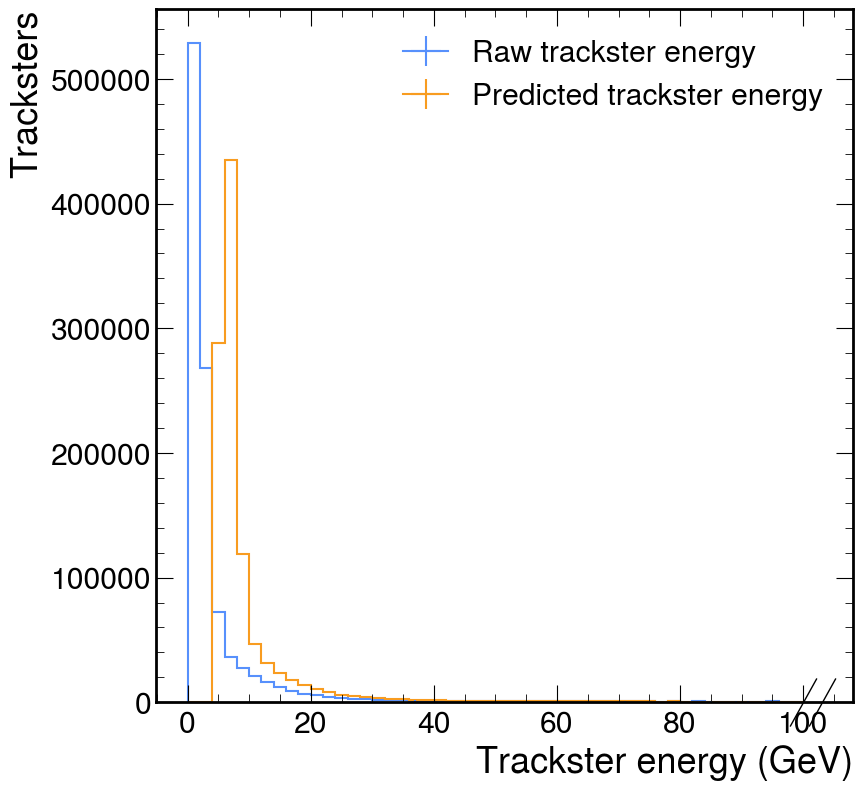

In [ ]:
plt.figure(figsize=(9, 9))
hep.histplot([h_reco, h_pred], label=["Raw trackster energy", "Predicted trackster energy"])
plt.ylabel("Tracksters")
plt.xlabel("Trackster energy (GeV)")
plt.legend(loc="upper right")

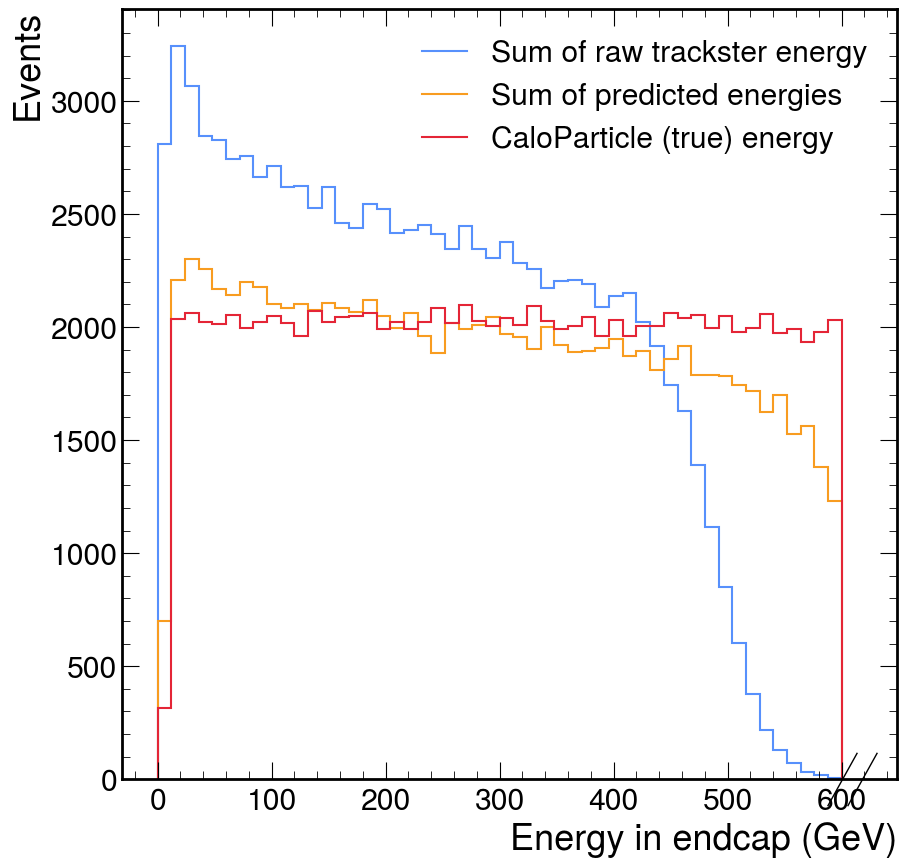

In [ ]:
plt.figure()
hep.histplot([h_reco_tot, h_pred_tot, h_cp], yerr=False, label=["Sum of raw trackster energy", "Sum of predicted energies", "CaloParticle (true) energy"])
plt.ylabel("Events")
plt.xlabel("Energy in endcap (GeV)")
plt.legend()

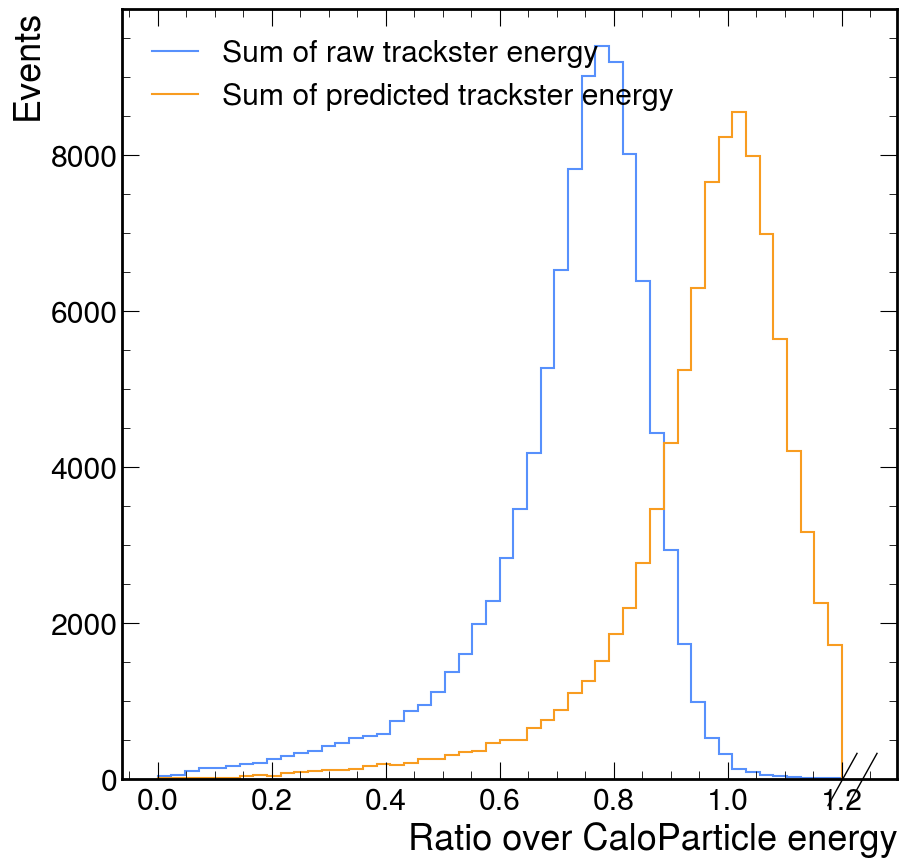

In [ ]:
plt.figure()
hep.histplot([h_reco_tot_over_cp, h_pred_tot_over_cp], yerr=False, label=["Sum of raw trackster energy", "Sum of predicted trackster energy"])
# param_optimised,__name__ = fitCruijff(h_seedOverCP_energy)
# x_plotFct = np.linspace(h_seedOverCP_energy.axes[0].centers[0], h_seedOverCP_energy.axes[0].centers[-1],500)
# plt.plot(x_plotFct,cruijff(x_plotFct,*param_optimised), label=f"Cruijff fit\n$\sigma={(param_optimised[2]+param_optimised[3])/2:.3f}$")
plt.ylabel("Events")
plt.xlabel("Ratio over CaloParticle energy")
plt.legend()